In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_excel("Book1.xlsx")
data

,review_tag,processed_reviews
0,Good,yeapreordered july got august package wa nice ...
1,Good,got delivered yesterday used hour tell first m...
2,Good,amazing phone
3,Good,brilliant
4,Good,wa skeptically changing one plus word still pr...
...,...,...
9397,Bad,good
9398,Bad,poor
9399,Bad,bed
9400,Bad,average


Epoch 1/10
106/106 [==============================] - 373s 3s/step - loss: 0.6974 - accuracy: 0.7413 - val_loss: 0.6007 - val_accuracy: 0.7517
Epoch 2/10
106/106 [==============================] - 376s 4s/step - loss: 0.4924 - accuracy: 0.8168 - val_loss: 0.5926 - val_accuracy: 0.7689
Epoch 3/10
106/106 [==============================] - 350s 3s/step - loss: 0.4327 - accuracy: 0.8418 - val_loss: 0.5869 - val_accuracy: 0.7636
Epoch 4/10
106/106 [==============================] - 389s 4s/step - loss: 0.3910 - accuracy: 0.8577 - val_loss: 0.6372 - val_accuracy: 0.7570
Epoch 5/10
106/106 [==============================] - 369s 3s/step - loss: 0.3437 - accuracy: 0.8784 - val_loss: 0.6472 - val_accuracy: 0.7689
Epoch 6/10
106/106 [==============================] - 361s 3s/step - loss: 0.3172 - accuracy: 0.8865 - val_loss: 0.6916 - val_accuracy: 0.7530
Epoch 7/10
106/106 [==============================] - 351s 3s/step - loss: 0.2861 - accuracy: 0.8988 - val_loss: 0.7857 - val_accuracy: 0.7570

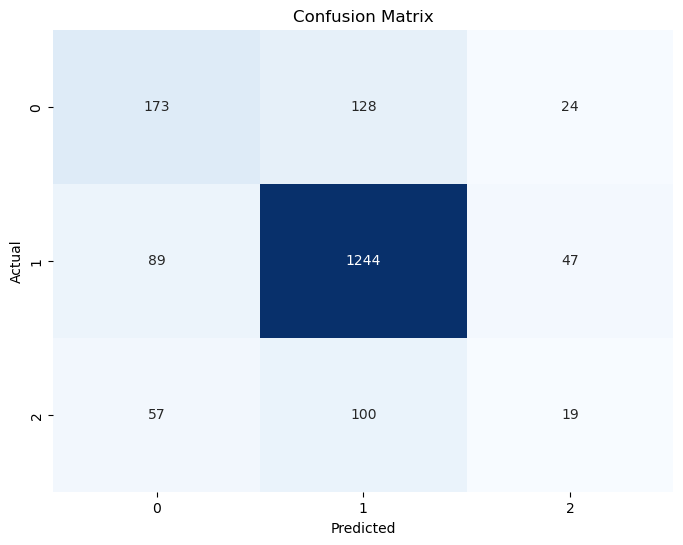

Accuracy: 0.7634236812591553
Classification Report:
               precision    recall  f1-score   support

         Bad       0.54      0.53      0.54       325
        Good       0.85      0.90      0.87      1380
    Moderate       0.21      0.11      0.14       176

    accuracy                           0.76      1881
   macro avg       0.53      0.51      0.52      1881
weighted avg       0.73      0.76      0.75      1881



In [2]:
reviews = data["processed_reviews"]
target = data["review_tag"]

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(reviews, target, test_size=0.2, random_state=42)

max_words = 10000  # Maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 200  # Maximum length of a sequence
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

embedding_dim = 100  

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict(X_test_padded)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
